In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import viz 
# use the style file
plt.style.use('style.mpl')

colors = viz.color_palette()

In [36]:
# inputs are a train of impulses J_t 
# that are normally distributed with mean 10 and sd 2
np.random.seed(1234)
J_t = np.random.normal(10, 2, 2000)

# simple example of an LTI survival function:
# tri-exponential decay in age
def decay(G_0, ages):
    ks = np.array([0.1, 0.05, 0.01])
    residual = G_0 * np.exp(-np.sum(ks) * ages)
    return residual

# age vector for calculating decay curves
ages = np.arange(0, 200)

In [37]:
# mosaic = 'ACCDD\nBCCDD'
# fig, axs = plt.subplot_mosaic(mosaic, layout='constrained', figsize=(7.25, 3))

# plt.sca(axs['A'])
# # stem plot of J_t

# for i, (J, color) in enumerate(zip(J_t[:5], color_order[:5])):
#     plt.stem(i, J, color)
    
# plt.xlabel('time')
# plt.xticks(np.arange(0, 8, 5))
# plt.xlim(-1, 8)
# plt.ylim(0, 14)
# plt.text(5.5, 5, '...', fontsize=12, ha='center', va='center')
# plt.ylabel(r'carbon inputs $J(t)$')
# plt.title('inputs over time')

# plt.sca(axs['B'])
# plt.stem(0, J_t[:1], color_order[0])
# ages = np.arange(100)
# plt.plot(ages, decay(J_t[0], ages), color=color_order[0])
# plt.xlabel('age')
# #plt.xticks(np.arange(len(J_t)))
# plt.xlim(-1.5, 20)
# plt.ylim(0, 14)
# plt.ylabel(r'residual $J(0)$')
# plt.title('decay with age')

# plt.sca(axs['C'])

# # Only have 10 colors -- plot the first 10
# for i, (J, color) in enumerate(zip(J_t[:10], color_order[:10])):
#     plt.stem(i, J, color)

# g_ts = np.zeros((len(J_t), len(ages)+len(J_t) + 10))
# for i in range(len(J_t)):
#     decay_i = decay(J_t[i], ages)
#     g_ts[i, i:i+len(decay_i)] = decay_i

#     # plot the first 10 only 
#     if i >= 10:
#         continue
#     plt.plot(ages + i, decay_i, color=color_order[i])
# plt.xlabel('time')
# plt.ylabel(r'$g_\tau(t)$')
# plt.text(15.5, 5, '...', fontsize=12, ha='center', va='center')
# plt.xlim(-1, 20)
# plt.ylim(0, 14)
# plt.title('inputs with different ages decay')

# # plot the stocks over time, which is the sum of 
# # what remains from prior inputs
# plt.sca(axs['D'])

# nts = g_ts.shape[1]
# njs = g_ts.shape[0]
# bottom = np.zeros(nts)
# ts = np.arange(nts)
# for i in range(njs):
#     color = color_order[i % len(color_order)]
#     top = bottom + g_ts[i, :]
#     plt.fill_between(ts, bottom, top, color=color, alpha=0.7, 
#                      edgecolor='k', lw=0.2)
#     bottom = top

# G_t = np.sum(g_ts, axis=0)
# plt.plot(ts, G_t, color='black', lw=2)
# plt.xlabel('time')
# plt.xlim(0, 50)
# plt.ylim(0, 83)
# plt.ylabel(r'total carbon stocks $G(t)$')
# plt.title(r'stocks = sum of residual inputs')

# plt.tight_layout()

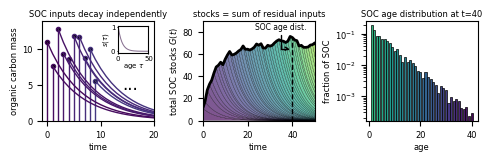

In [ ]:
mosaic = 'ABC'
fig, axs = plt.subplot_mosaic(mosaic, layout='constrained', figsize=(4.76, 1.5))

plt.sca(axs['A'])

# make a color palette with 20 colors
color_order = sns.color_palette("viridis", 60)

# plot the first 10 inputs
for i, (J, color) in enumerate(zip(J_t[:10], color_order[:10])):
    markerline, stemlines, baseline = plt.stem(
        i, J, color)
    markerline.set_markerfacecolor('k')
    markerline.set_markersize(3)
    stemlines.set_linewidth(1)

g_ts = np.zeros((len(J_t), len(ages)+len(J_t) + 10))
for i in range(len(J_t)):
    decay_i = decay(J_t[i], ages)
    g_ts[i, i:i+len(decay_i)] = decay_i

    # plot the first 10 only 
    if i >= 10:
        continue
    plt.plot(ages + i, decay_i, color=color_order[i], lw=1)

plt.xlabel('time')
plt.ylabel('organic carbon mass')
plt.text(15.5, 5, '...', fontsize=12, ha='center', va='center')
plt.xlim(-1, 20)
plt.ylim(0, 14)
plt.title('SOC inputs decay independently')

# Make an inset axis on the top right of A
inset_ax = axs['A'].inset_axes([0.68, 0.68, 0.27, 0.27])
# Plot a single decay curve in the inset
inset_ax.plot(ages, decay(1.0, ages), color=colors['dark_purple'], lw=1.5)
inset_ax.set_xlim(0, 50)
inset_ax.set_xlabel(r'age $\tau$', fontsize=5, labelpad=0)
inset_ax.set_ylabel(r'$s(\tau)$', fontsize=5, labelpad=0)
inset_ax.tick_params(axis='both', which='major', labelsize=5, length=1, pad=1)

# plot the stocks over time, which is the sum of 
# what remains from prior inputs
plt.sca(axs['B'])

nts = g_ts.shape[1]
njs = g_ts.shape[0]
bottom = np.zeros(nts)
ts = np.arange(nts)
for i in range(njs):
    color = color_order[i % len(color_order)]
    top = bottom + g_ts[i, :]
    plt.fill_between(ts, bottom, top, color=color, alpha=0.7, 
                     edgecolor='k', lw=0.2)
    bottom = top

G_t = np.sum(g_ts, axis=0)
plt.plot(ts, G_t, color='black', lw=2)

# make a vertical dashed line at time = 45
my_t = 40
ymax = G_t[my_t]
plt.plot([my_t, my_t], [0, ymax], color='k', linestyle='--', lw=1)
# annotate the line with a curved arrow
arrowprops=dict(arrowstyle='->', connectionstyle='angle', lw=1)
plt.annotate('SOC age dist.', xy=(my_t, ymax-10), xytext=(my_t - 5, ymax + 7),
             arrowprops=arrowprops, fontsize=5.5, ha='center',
             bbox=dict(boxstyle='square,pad=0.0', edgecolor='none', facecolor='None'))

plt.xlabel('time')
plt.xlim(0, 50)
plt.ylim(0, 90)
plt.ylabel(r'total SOC stocks $G(t)$')
plt.title(r'stocks = sum of residual inputs')

plt.sca(axs['C'])
SOC_ages = my_t - ts
stocks = g_ts[:, my_t]

# remove negative ages and normalize
SOC_ages = SOC_ages[:my_t]
stocks = stocks[:my_t]
normalized_stocks = stocks / np.sum(stocks)

# plot the amount as a function of age
plt.yscale('log')
plt.bar(SOC_ages, normalized_stocks, 
        color=color_order[:my_t],
        edgecolor='k', linewidth=0.5)

plt.xlabel('age')
plt.ylabel('fraction of SOC')
plt.title('SOC age distribution at t=40')

#plt.tight_layout()
plt.savefig('../figures/fig1.png', dpi=300, bbox_inches='tight')
plt.show()